<a href="https://colab.research.google.com/github/akaumov/pyplot-tutorial/blob/master/PyPlotImageTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyPlot Image Tutorial
## Intro


Connect to a GUI event loop, using iPython magic:

In [0]:
%matplotlib inline

Import dependencies

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Read image from local disk
### Upload file using colab utilities



In [122]:
from google.colab import files
uploaded_files = files.upload()

for file_name in uploaded_files:
  break

raw_image = uploaded_files[file_name]

Saving Webp.net-resizeimage.png to Webp.net-resizeimage (2).png


### Convert byte-array to PIL Image

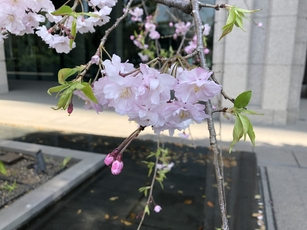

In [123]:
from io import BytesIO
from PIL import Image

#PIL image
pil_image = Image.open(BytesIO(raw_image))
pil_image

### Convert PIL image to NumPy array

In [124]:
image_np = np.array(pil_image)
print("NumPy array shape = {}".format(image_np.shape))
image_np

NumPy array shape = (230, 307, 3)


array([[[224, 210, 233],
        [225, 211, 234],
        [227, 212, 233],
        ...,
        [146, 150, 153],
        [150, 154, 157],
        [156, 157, 161]],

       [[227, 213, 236],
        [225, 211, 234],
        [217, 202, 225],
        ...,
        [150, 154, 157],
        [151, 155, 158],
        [155, 156, 160]],

       [[225, 209, 235],
        [219, 203, 229],
        [213, 199, 224],
        ...,
        [147, 151, 154],
        [149, 153, 156],
        [153, 154, 158]],

       ...,

       [[167, 170, 175],
        [169, 172, 177],
        [168, 171, 176],
        ...,
        [155, 156, 160],
        [146, 147, 151],
        [148, 149, 153]],

       [[167, 172, 176],
        [164, 169, 173],
        [146, 151, 155],
        ...,
        [153, 152, 157],
        [150, 149, 154],
        [152, 151, 156]],

       [[156, 161, 165],
        [137, 142, 146],
        [119, 124, 128],
        ...,
        [156, 155, 160],
        [158, 157, 162],
        [158, 157, 162]]

## Plotting NymPy array as image to plot

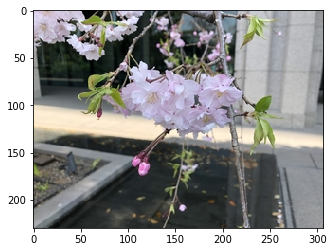

In [125]:
plt.imshow(image_np)
plt.show()

## Convert image to luminosity (2D, no color) image

[[224 225 227 ... 146 150 156]
 [227 225 217 ... 150 151 155]
 [225 219 213 ... 147 149 153]
 ...
 [167 169 168 ... 155 146 148]
 [167 164 146 ... 153 150 152]
 [156 137 119 ... 156 158 158]]


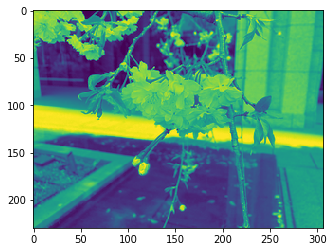

In [126]:
# get only red channel from RGB data set (default)
lum_img = image_np[:, :, 0]

print(lum_img)
plt.imshow(lum_img)

## Apply color map on the luminosity image

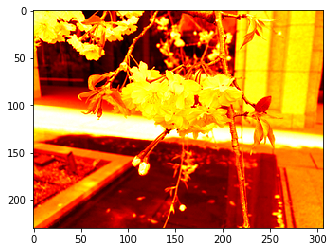

In [127]:
 plt.imshow(lum_img, cmap="hot")
  

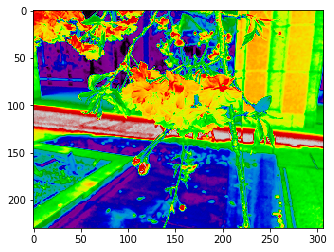

In [128]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

## Add color bars to an image

It’s helpful to have an idea of what value a color represents. We can do that by adding color bars.

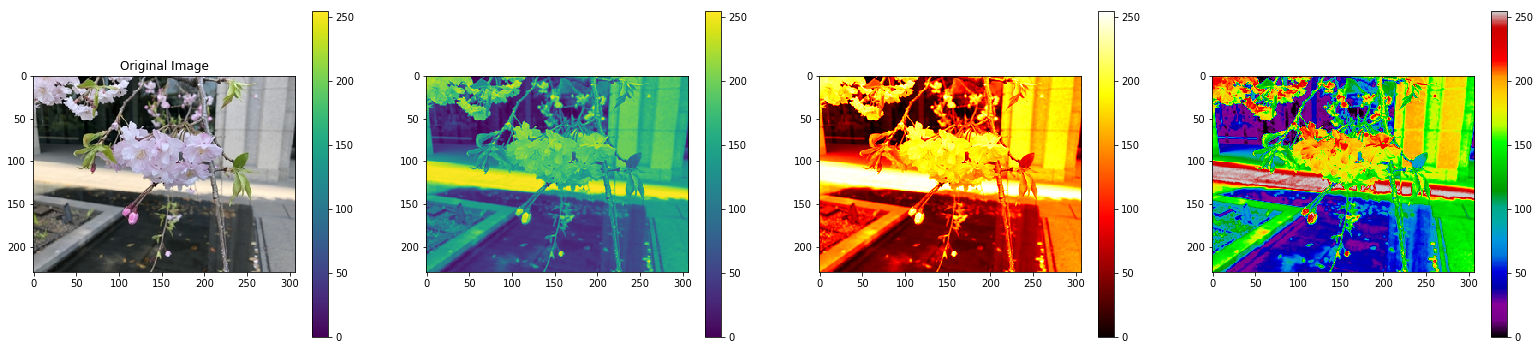

In [129]:
plt.figure(figsize=(27, 6))
plt.subplot(141)
plt.imshow(image_np)
plt.title('Original Image')
plt.colorbar()

plt.subplot(142)
plt.imshow(lum_img)
plt.colorbar()

plt.subplot(143)
plt.imshow(lum_img, cmap='hot')
plt.colorbar()

plt.subplot(144)
plt.imshow(lum_img, cmap='nipy_spectral')
plt.colorbar()

## Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

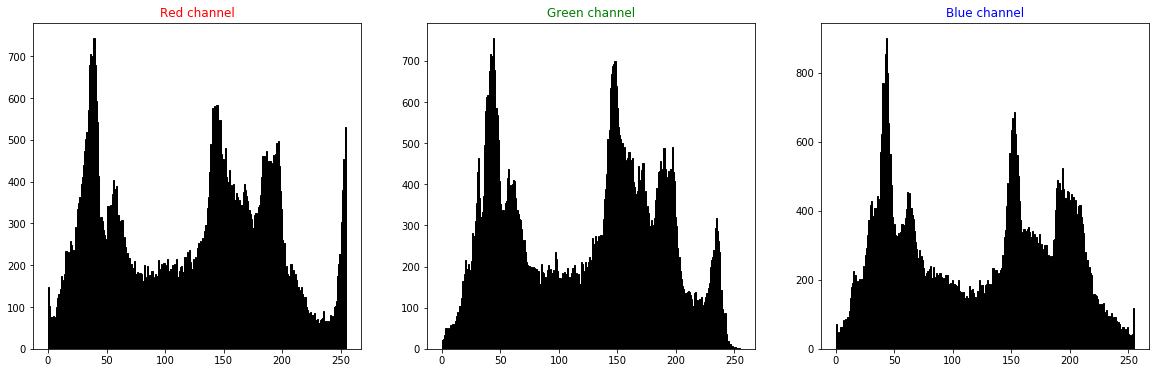

In [130]:
#Let's extract more channels
lum_img_red = image_np[:, :, 0]
lum_img_green = image_np[:, :, 1]
lum_img_blue = image_np[:, :, 2]

#set figure size
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.title('Red channel', color='red')
plt.hist(lum_img_red.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

plt.subplot(132)
plt.title('Green channel', color='green')
plt.hist(lum_img_green.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

plt.subplot(133)
plt.title('Blue channel', color='blue')
plt.hist(lum_img_blue.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

plt.show()

Most often, the “interesting” part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak.

 Let’s adjust the upper limit, so that we effectively “zoom in on” part of the histogram

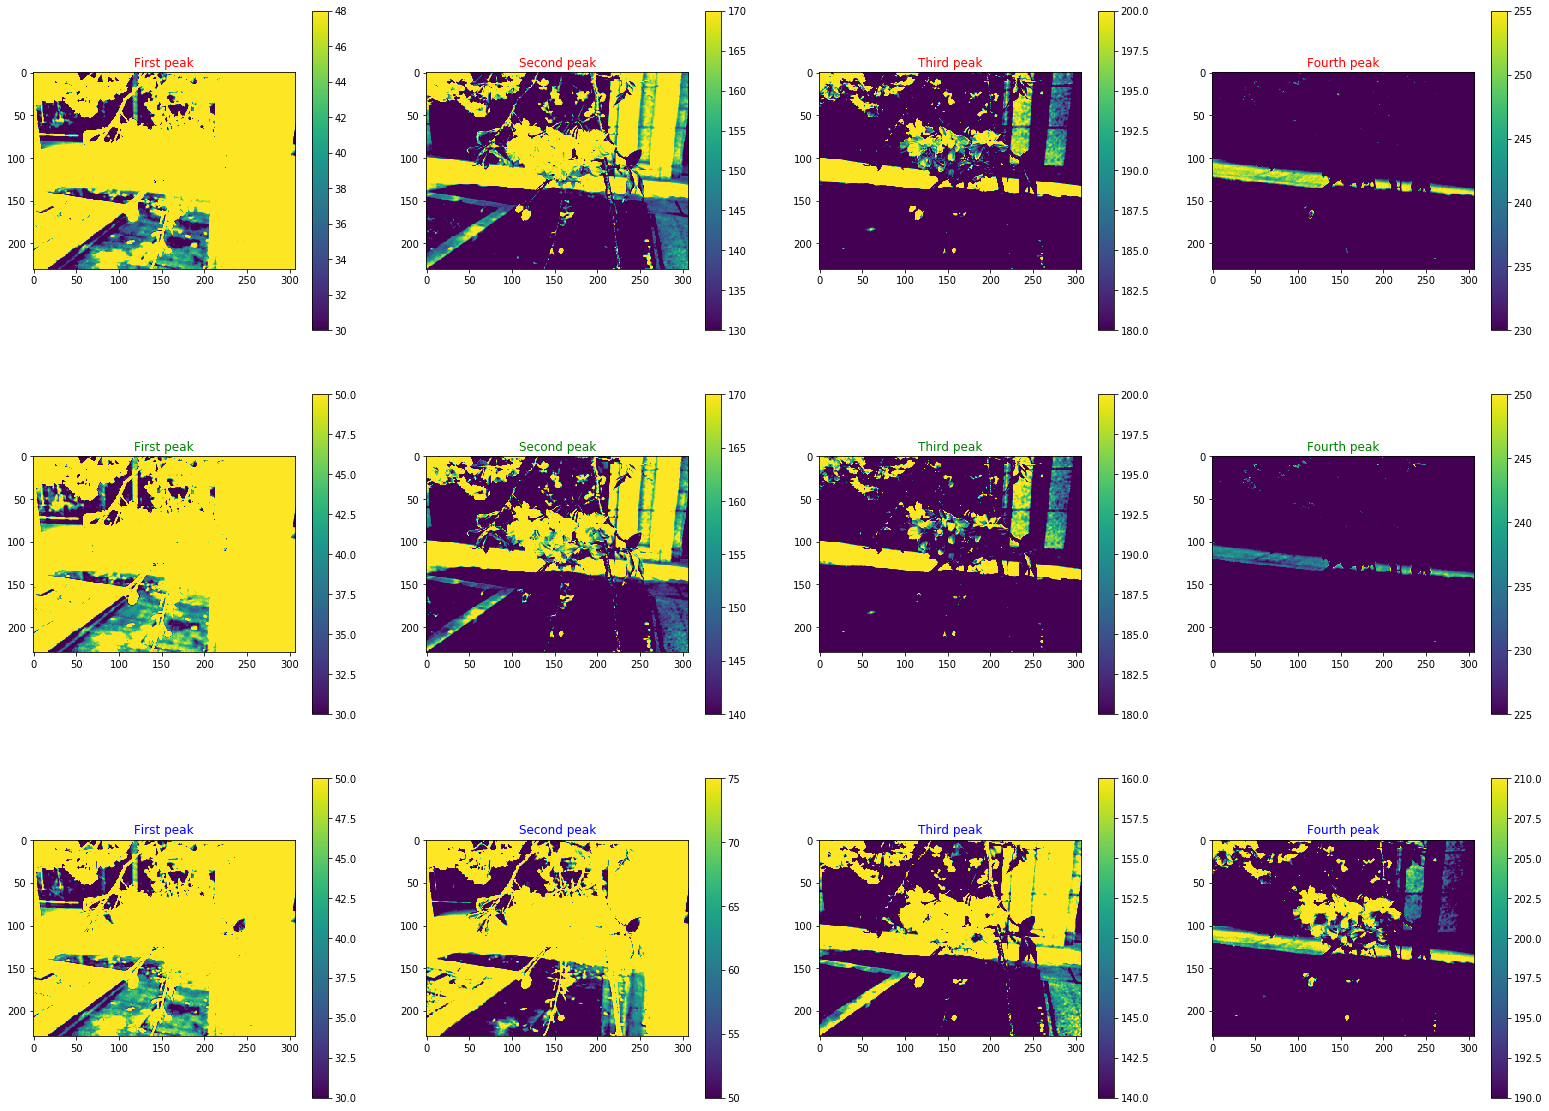

In [131]:
plt.figure(figsize=(27, 20))

# Red channel
plt.subplot(3, 4, 1)
plt.title('First peak', color='red')
imgplot = plt.imshow(lum_img_red, clim=(30, 48))
plt.colorbar()

plt.subplot(3 ,4, 2)
plt.title('Second peak', color='red')
imgplot = plt.imshow(lum_img_red, clim=(130, 170))
plt.colorbar()

plt.subplot(3, 4, 3)
plt.title('Third peak', color='red')
imgplot = plt.imshow(lum_img_red, clim=(180, 200))
plt.colorbar()

plt.subplot(3, 4, 4)
plt.title('Fourth peak', color='red')
imgplot = plt.imshow(lum_img_red, clim=(230, 255))
plt.colorbar()

# Greeen channel
plt.subplot(3, 4, 5)
plt.title('First peak', color='green')
imgplot = plt.imshow(lum_img_green, clim=(30, 50))
plt.colorbar()

plt.subplot(3, 4, 6)
plt.title('Second peak', color='green')
imgplot = plt.imshow(lum_img_green, clim=(140, 170))
plt.colorbar()

plt.subplot(3, 4, 7)
plt.title('Third peak', color='green')
imgplot = plt.imshow(lum_img_green, clim=(180, 200))
plt.colorbar()

plt.subplot(3, 4, 8)
imgplot = plt.imshow(lum_img_green, clim=(225, 250))
plt.title('Fourth peak', color='green')
plt.colorbar()

# Blue channel
plt.subplot(3, 4, 9)
plt.title('First peak', color='blue')
imgplot = plt.imshow(lum_img_blue, clim=(30, 50))
plt.colorbar()

plt.subplot(3, 4,10)
plt.title('Second peak', color='blue')
imgplot = plt.imshow(lum_img_blue, clim=(50, 75))
plt.colorbar()

plt.subplot(3, 4,11)
plt.title('Third peak', color='blue')
imgplot = plt.imshow(lum_img_blue, clim=(140, 160))
plt.colorbar()

plt.subplot(3, 4,12)
plt.title('Fourth peak', color='blue')
imgplot = plt.imshow(lum_img_blue, clim=(190, 210))
plt.colorbar()

plt.show()

## Image interpolation

Interpolation calculates what the color or value of a pixel “should” be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information.

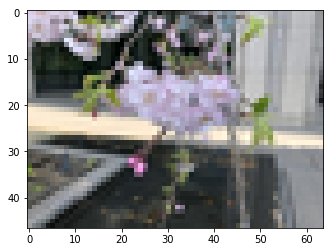

In [132]:
pil_image.thumbnail((64,64), Image.ANTIALIAS)
imgplot = plt.imshow(pil_image)

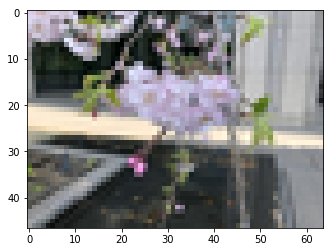

In [133]:
imgplot = plt.imshow(pil_image, interpolation="nearest")

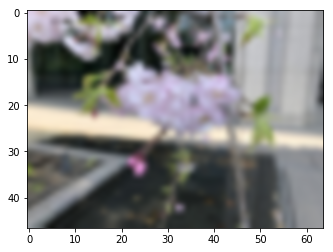

In [134]:
imgplot = plt.imshow(pil_image, interpolation="bicubic")